In [1]:
print("Hello World")

Hello World


# Installing Dependencies

In [2]:
%pip install pandas matplotlib numpy seaborn scikit-learn graphviz

Note: you may need to restart the kernel to use updated packages.


# Importing Libraries

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt

# Main Code

In [4]:
df = pd.read_csv("Social_Network_Ads.csv")
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [5]:
NAs = pd.concat([df.isnull().sum()], axis=1, keys=['Null values'])
NAs[NAs.sum(axis=1)>0]

,Null values


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Age              400 non-null    int64
 1   EstimatedSalary  400 non-null    int64
 2   Purchased        400 non-null    int64
dtypes: int64(3)
memory usage: 9.5 KB


In [7]:
df.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


<Axes: ylabel='Age'>

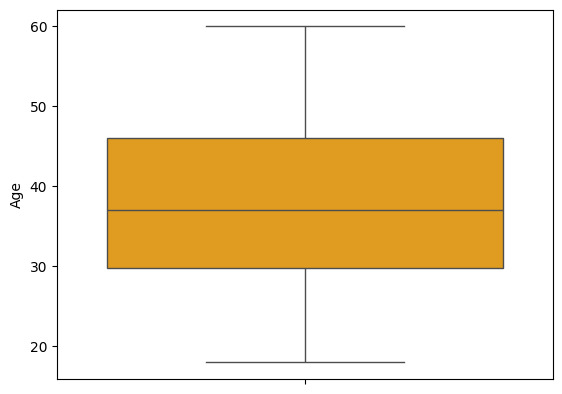

In [8]:
sns.boxplot(df["Age"],color="orange")

<Axes: ylabel='EstimatedSalary'>

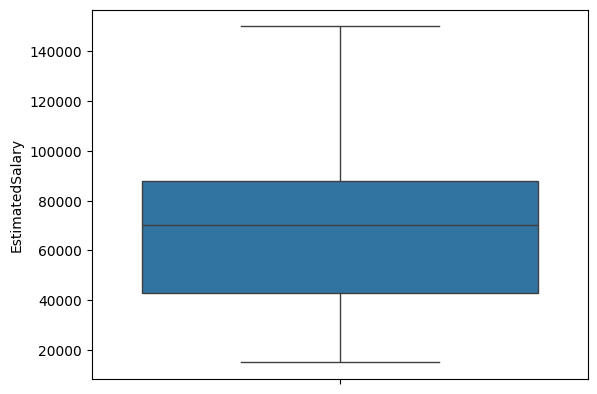

In [9]:
sns.boxplot(df["EstimatedSalary"])

<Axes: >

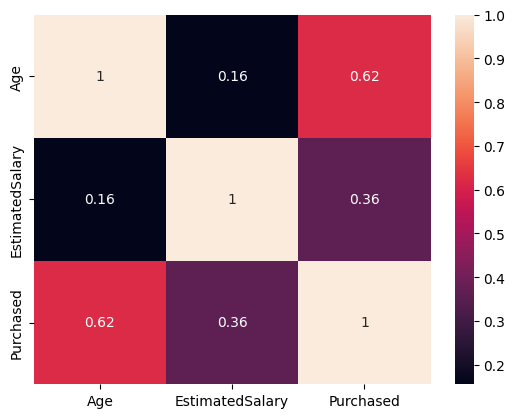

In [10]:
sns.heatmap(df.corr(),annot=True)

In [11]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()

In [12]:
x=df.drop(["Purchased"],axis=1)
y=df["Purchased"]

In [13]:
x=ss.fit_transform(x)

In [14]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [15]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(n_estimators=40,random_state=0)

In [16]:
rf.fit(x_train,y_train)

RandomForestRegressor(n_estimators=40, random_state=0)

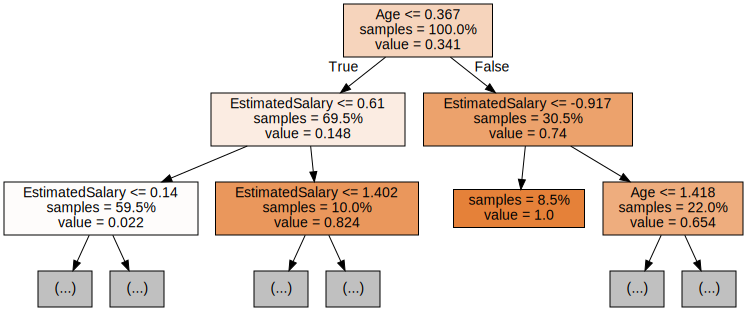

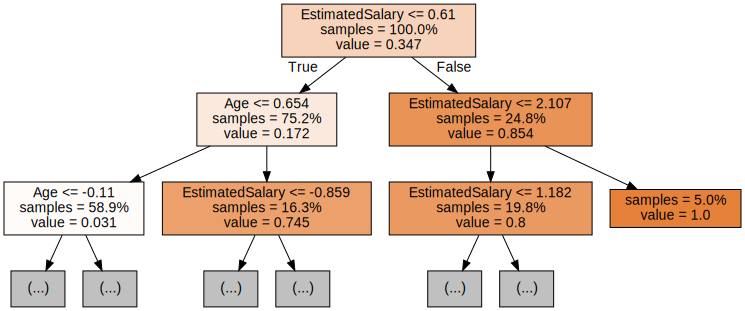

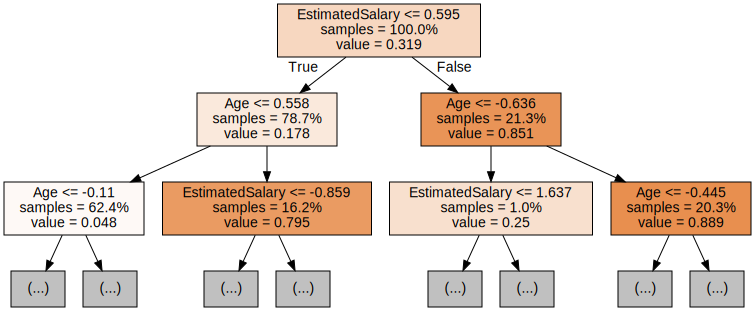

In [17]:
import graphviz
from sklearn.tree import export_graphviz

feature_names = ['Age', 'EstimatedSalary']

for i in range(3):
    tree = rf.estimators_[i]
    dot_data = export_graphviz(tree,
                               feature_names=feature_names,  
                               filled=True,  
                               max_depth=2, 
                               impurity=False, 
                               proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)

In [18]:
y_pred=np.matrix.round(rf.predict(x_test))

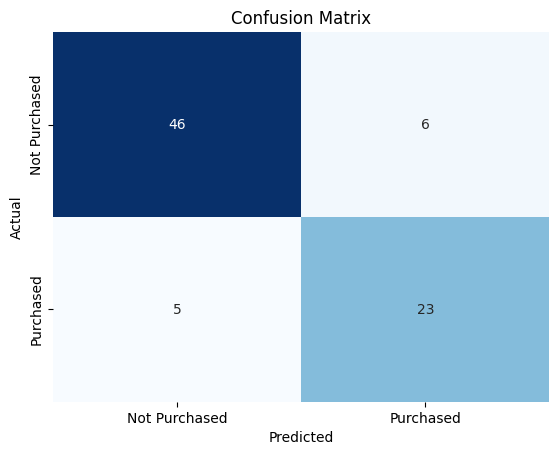

In [19]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
           xticklabels=['Not Purchased', 'Purchased'], yticklabels=['Not Purchased', 'Purchased'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

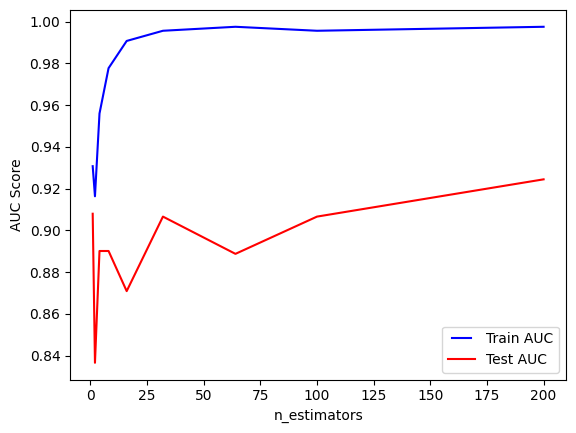

In [20]:
from sklearn.metrics import auc, roc_curve
from sklearn.ensemble import RandomForestClassifier

n_estimators = [1, 2, 4, 8, 16, 32, 64, 100, 200]
train_results = []
test_results = []

for estimator in n_estimators:
    rf = RandomForestClassifier(n_estimators=estimator, n_jobs=-1)
    rf.fit(x_train, y_train)
    train_pred = rf.predict(x_train)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)
    y_pred = rf.predict(x_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)
    
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(n_estimators, train_results, "b", label="Train AUC")
line2, = plt.plot(n_estimators, test_results, "r", label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC Score')
plt.xlabel('n_estimators')
plt.show()

In [21]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
print(round(roc_auc*100,2))

92.45
